<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/bagging_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install dtreeviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.1 MB/s eta 0:00:00


In [28]:
import matplotlib
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']


In [33]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = pd.DataFrame(load_iris().data,columns=load_iris().feature_names)
data['target'] = load_iris().target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])
data = data.drop(['sepal length (cm)', 'petal width (cm)'],axis=1)

In [6]:
data.head()
data.tail()

,sepal width (cm),petal length (cm),target
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2
149,3.0,5.1,2


In [9]:
data = data[data['target']!=0]
data.head()

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


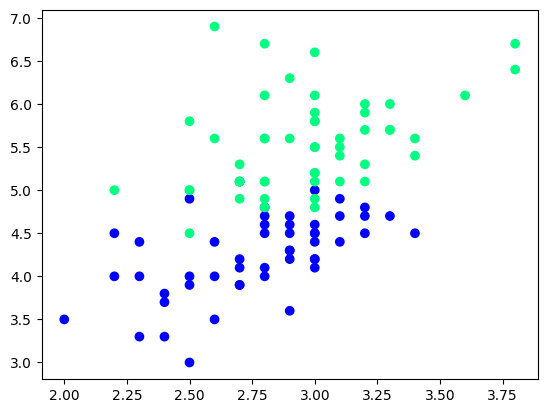

In [12]:
plt.scatter(data['sepal width (cm)'],data['petal length (cm)'],c=data['target'],cmap='winter');

In [15]:
#taking only 10 rows for training

data = data.sample(100)
data_train = data.iloc[:60,:].sample(10)
data_val = data.iloc[60:80,:].sample(5)
data_test = data.iloc[80:,:].sample(5)

In [17]:
X_test = data_val.iloc[:,0:2].values
y_test = data_val.iloc[:,-1].values
y_test

array([2, 1, 1, 2, 1])

In [18]:
X_test

array([[2.6, 6.9],
       [2.8, 4.7],
       [2.9, 4.5],
       [2.5, 5.8],
       [3. , 4.5]])

**BAGGING**

In [31]:
from dtreeviz import model

def evaluate(clf, X, y):
  clf.fit(X,y)

  viz = model(clf,X,y,feature_names=list(X.columns), target_name = "target", class_names = [str(c) for c in np.unique(y)])
  return viz

In [22]:
data_bag = data_train.sample(8,replace=True)
X = data_bag.iloc[:,0:2]
y = data_bag.iloc[:,-1]

data_bag

,sepal width (cm),petal length (cm),target
109,3.6,6.1,2
97,2.9,4.3,1
58,2.9,4.6,1
93,2.3,3.3,1
97,2.9,4.3,1
109,3.6,6.1,2
57,2.4,3.3,1
93,2.3,3.3,1


In [26]:
y = y.replace({1: 0, 2: 1})


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


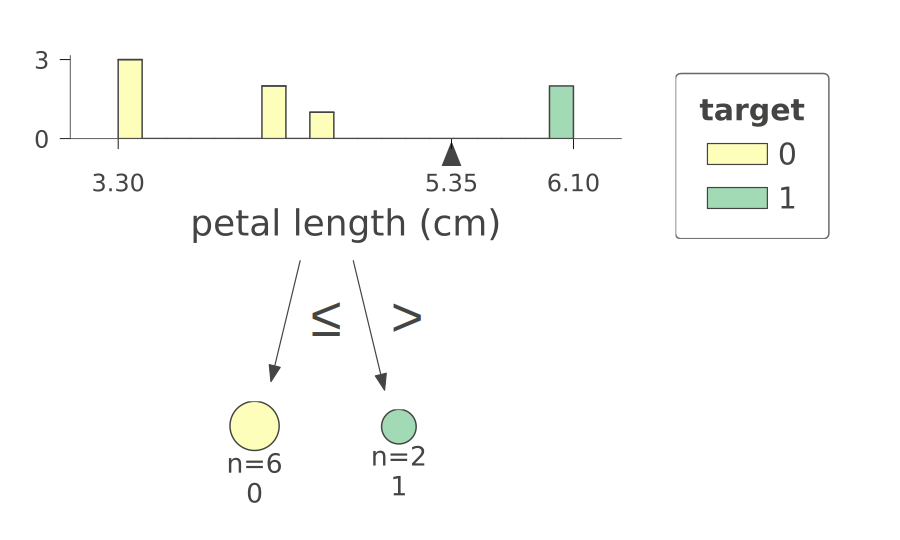

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
viz = evaluate(clf,X,y)
viz.view(scale=4)

In [37]:
data_bag = data_train.sample(8,replace=True)
X = data_bag.iloc[:,0:2]
y = data_bag.iloc[:,-1]

data_bag

,sepal width (cm),petal length (cm),target
109,3.6,6.1,2
74,2.9,4.3,1
58,2.9,4.6,1
97,2.9,4.3,1
104,3.0,5.8,2
97,2.9,4.3,1
125,3.2,6.0,2
93,2.3,3.3,1
